### Computational Guided Inquiry for PChem (Neshyba)

# Visualizing $U(T,V)$,  $C_V$, and $\pi_T$.

## Visualizing $U(T,V)$ as a thermodynamic surface

Internal energy is usually written as a function of T and V, designated by the notation $U=U(T,V)$. Conceptually, this energy is very straightforward: it is the sum of the kinetic and potential energies of all molecules in a given sample. Figure 1 below shows $U(T,V)$ of a real gas. You can see some of the behaviors expected of all gases (e.g., increasing $U$ with increasing temperature), and some of the behaviors expected specifically of real gases (see the low-volume part of state space).

<p style='text-align: center;'>
<img src="http://webspace.pugetsound.edu/facultypages/nesh/Notebook/UVT figure 3.png" height="700" width="700"/>  
<strong>Figure 1</strong>. Thermodynamic surface of the internal energy, $U$, of a gas in a volume / temperature state space.
</p>


## Visualizing $C_V$ and $\pi_T$

Formally, the slope of $U$ in the temperature direction, at constant volume, is written $\big(\frac{\partial U}{\partial T}\big)_V$. This slope has a name, the *constant-volume heat capacity,* and is symbolized $C_V$. So we say

$$
C_V =  \big(\frac{\partial U}{\partial T}\big)_V \ \ \ \ (1)
$$

Similarly, the slope of $U$ in the pressure direction is given a special symbol, $\pi_T$, and name, the *internal pressure* (because it has units pressure). So we say

$$ 
\pi_T =  \big(\frac{\partial U}{\partial V}\big)_T \ \ \ \ (2)
$$

We already have code to this -- the partial derivative functions dF_dx and dF_dy, but there are a few tricky points about it that we'll address as we go along.


## About units
As previously, the data stored in the files that you'll be picking up in this exercise are *almost* all SI, with the exception of the energy values stored in Ugrid1.txt, etc. We're going to make this an all-SI CGI, so we'll be converting the energies to Joules as we load that data into Python. One consequence of that choice (a good consequence) is that we'll know the units of $C_V$ and $\pi_T$! As a teaser: since $C_V =  \big(\frac{\partial U}{\partial T}\big)_V$, it must have dimensions energy/temperature -- so according to the SI guarantee, that must be J/K (or J/mol-K if we're talking about one mole). Another teaser: since $\pi_T =  \big(\frac{\partial U}{\partial V}\big)_T$, it must have dimensions energy/volume, which turns out to be a pressure.


## Learning Goals
1. Given an image of $U(T,V)$ as a thermodynamic surface, I can predict what $C_V$ and $\pi_T$ will look like as thermodynamic surfaces. 
1. Given a state function (like $U(T,V)$) in gridded form, I can use partial derivative functions dF_dx and dF_dy to compute and display the corresponding partial derivatives ($C_V$ and $\pi_T$). 
1. I can use numpy's *max* and *min* functions to pull out the maximum or minimum value of a set of variables.

In [1]:
# Import resources 
import pint; from pint import UnitRegistry; AssignQuantity = UnitRegistry().Quantity
import numpy as np
import matplotlib.pyplot as plt
import PchemLibrary as PL
from mpl_toolkits.mplot3d import axes3d

In [2]:
%matplotlib notebook

### Loading and inspecting the data
The cell below loads and plots three internal energy state functions on a $(T,V)$ state space grid. The state space is SI (degrees K for temperature, $m^3$ for volume). However, the energy is in kJ/mol, whereas SI would be J/mol. So we're making the conversion to SI "on the fly".

(50, 50)
(50, 50)
(50, 50)
(50, 50)
(50, 50)


<IPython.core.display.Javascript object>


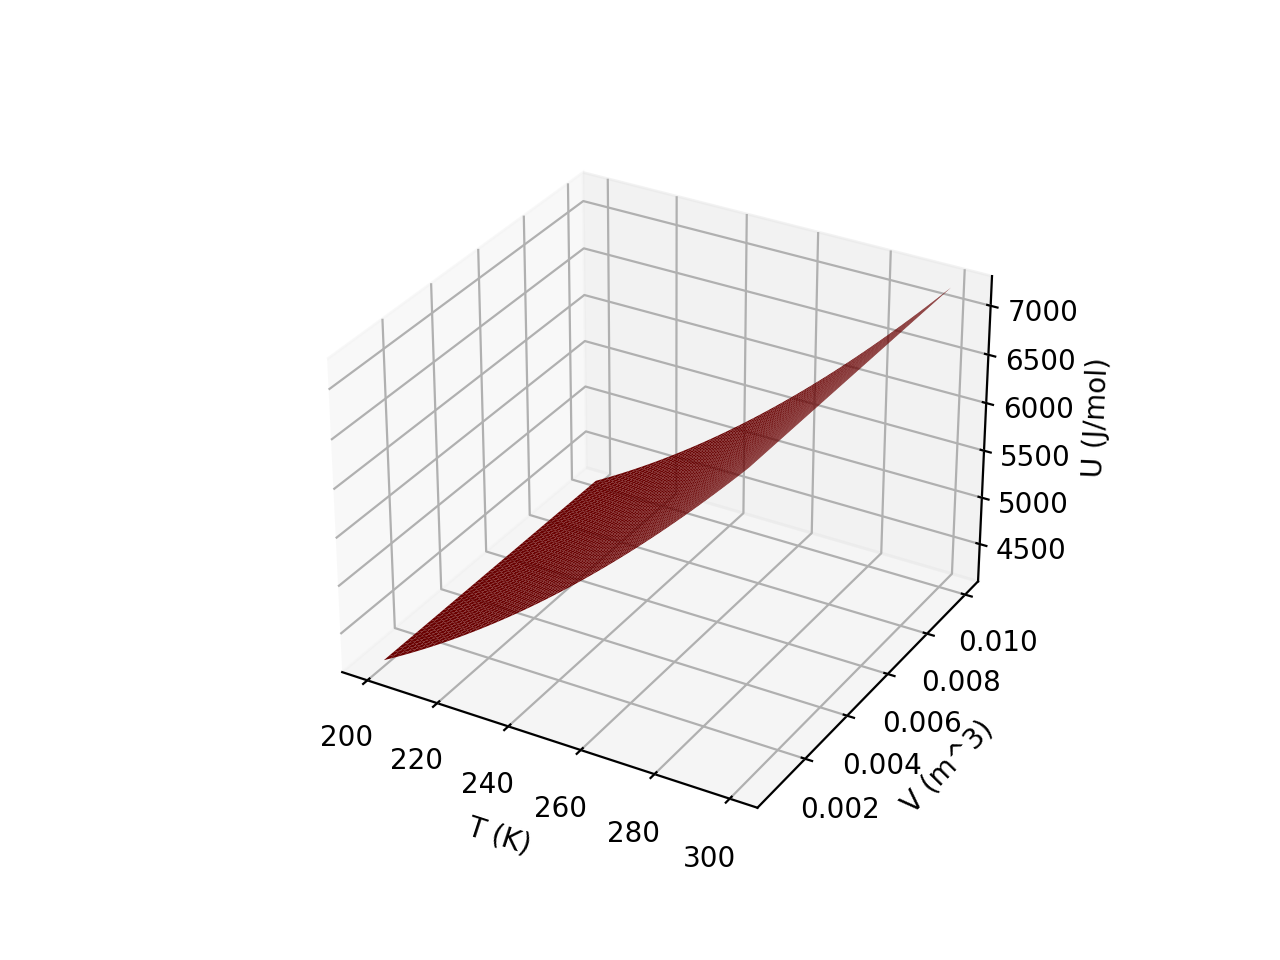

<IPython.core.display.Javascript object>


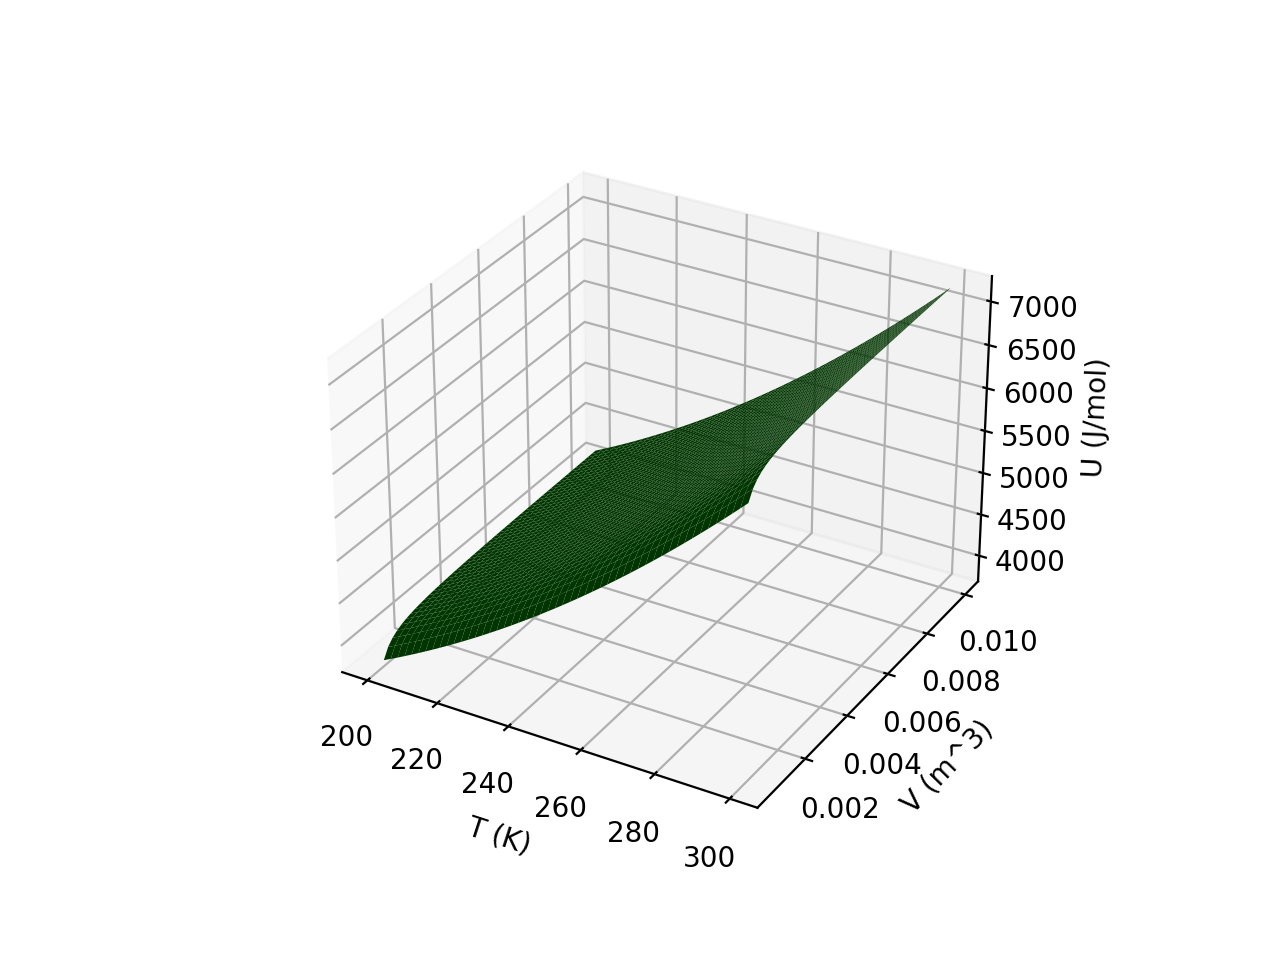

<IPython.core.display.Javascript object>


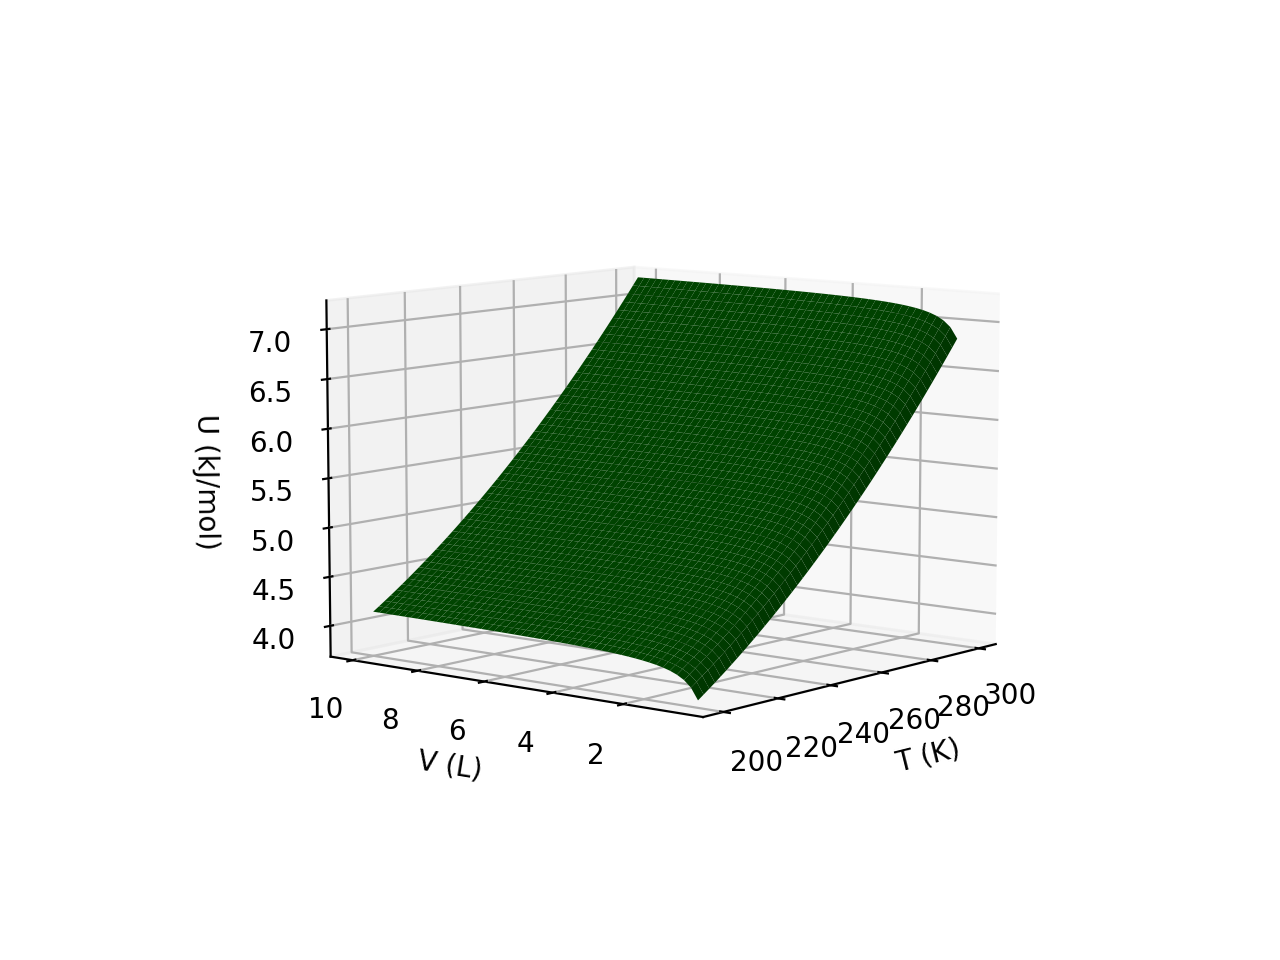

<IPython.core.display.Javascript object>


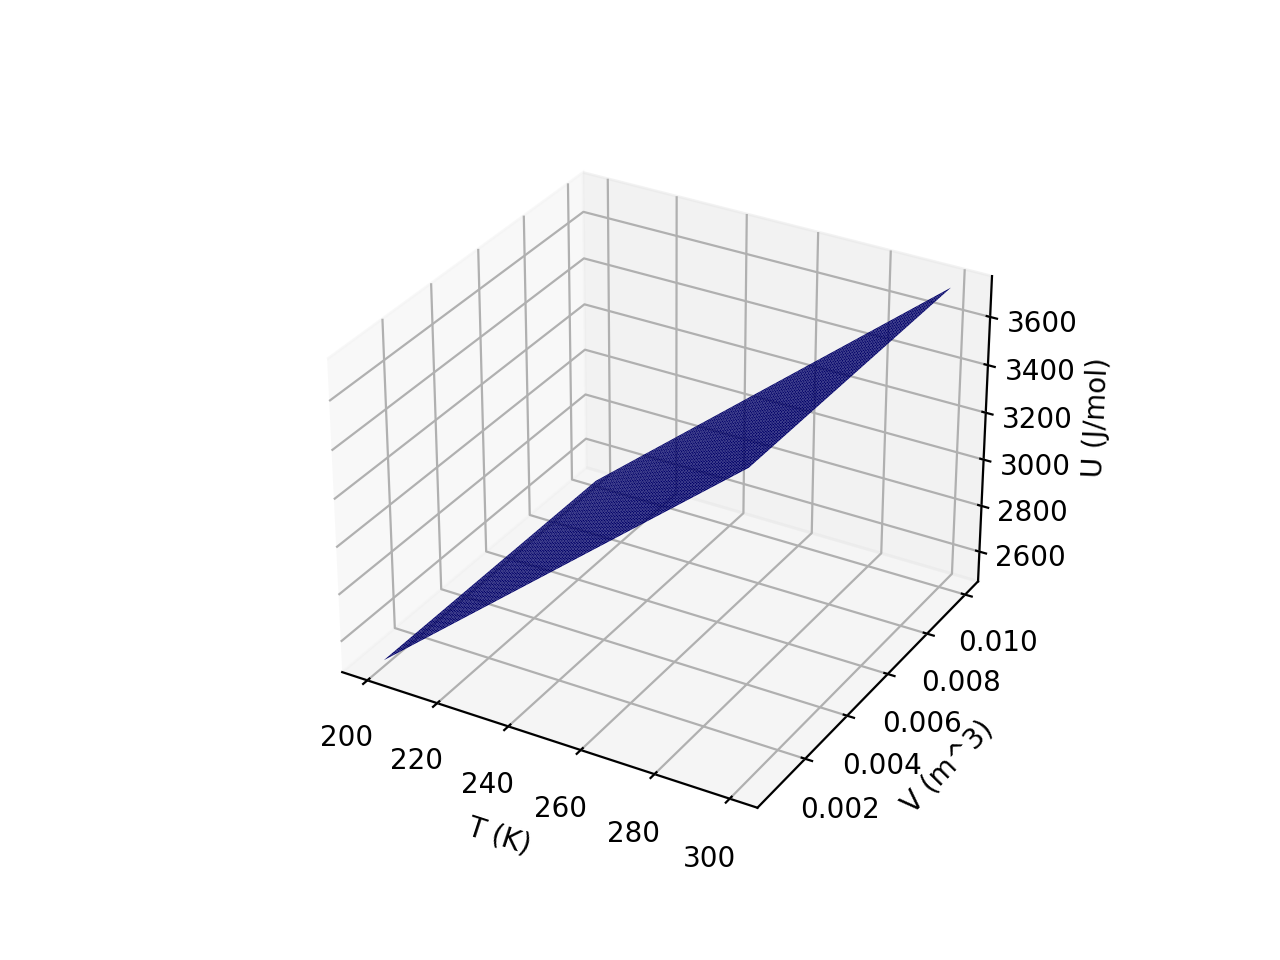

Text(0.5, 0, 'U (J/mol)')

In [3]:
# Loading the thermodynamic state space
Tgrid = np.loadtxt('Tgrid.txt'); print(np.shape(Tgrid)) # In K
Vgrid = np.loadtxt('Vgrid.txt'); print(np.shape(Vgrid)) # In m^3

# Loading three internal energy state functions 
Ugrid1 = np.loadtxt('Ugrid1.txt')*1e3; print(np.shape(Ugrid1))  # Converting to J/mol on the fly
Ugrid2 = np.loadtxt('Ugrid2.txt')*1e3; print(np.shape(Ugrid2)) 
Ugrid3 = np.loadtxt('Ugrid3.txt')*1e3; print(np.shape(Ugrid3)) 

# Plotting surface 1
ax = PL.plot_surface(Tgrid, Vgrid, Ugrid1, color='red') # Make the mesh plot
ax.set_ylabel('V (m^3)') # Label axes
ax.set_xlabel('T (K)')
ax.set_zlabel('U (J/mol)')

# Plot surface 2
### BEGIN SOLUTION
ax = PL.plot_surface(Tgrid, Vgrid, Ugrid2, color='green') # Make the mesh plot
ax.set_ylabel('V (m^3)') # Label axes
ax.set_xlabel('T (K)')
ax.set_zlabel('U (J/mol)')

ax = PL.plot_surface(Tgrid, Vgrid*1e3, Ugrid2/1e3, color='green') # Make the mesh plot
ax.set_ylabel('V (L)') # Label axes
ax.set_xlabel('T (K)')
ax.set_zlabel('U (kJ/mol)')


### END SOLUTION

# Plot surface 3
### BEGIN SOLUTION
ax = PL.plot_surface(Tgrid, Vgrid, Ugrid3, color='blue') # Make the mesh plot
ax.set_ylabel('V (m^3)') # Label axes
ax.set_xlabel('T (K)')
ax.set_zlabel('U (J/mol)')
### END SOLUTION

### Pause for analysis
A couple of features of these three surfaces you might make a note of:

1. The size of the state space grids is 50x50.
1. All three $U(T,V)$ surfaces go up with increasing temperature, although $U_3(T,V)$ does so with a constant slope, while $U_1(T,V)$ and $U_2(T,V)$ do so with some curvature. 

Both these will become important later, as you distinguish which $U(T,V)$ surfaces describe real or ideal gases, and which describe monatomic or polyatomic gases.

Now take a close look at the volume dependence of three surfaces: only one is volume-dependent. Which one? 

### Computing $C_V$ as thermodynamic surfaces
In the cell below, we compute the three $C_V$ surfaces corresponding to these three $U(T,V)$ surfaces. 

In [4]:
# Calculate the partial of U with respect to T (axis=0)
Tgridnew, Vgridnew, CV1 = PL.dF_dx([Tgrid,Vgrid],Ugrid1)
Tgridnew, Vgridnew, CV2 = PL.dF_dx([Tgrid,Vgrid],Ugrid2)
Tgridnew, Vgridnew, CV3 = PL.dF_dx([Tgrid,Vgrid],Ugrid3)

Shape of partial derivative = (49, 50)
No units
Shape of partial derivative = (49, 50)
No units
Shape of partial derivative = (49, 50)
No units


### Your turn
In the cell below, plot the three $C_V$ surfaces (three separate graphs) in a temperature-volume state space. A couple of notes about this:

1. We're using the new state space grids Tgridnew and Vgridnew, because (as you may recall) dF_dx shortened its shape: it has only 49 temperatures now.
1. We're also using numpy's max function to get a sense of the range of $C_V$ values, so that all three $C_V$ functions will all appear on the same vertical scale; this makes comparison easier.

The maximum Cv value is 40.58091836734775


<IPython.core.display.Javascript object>


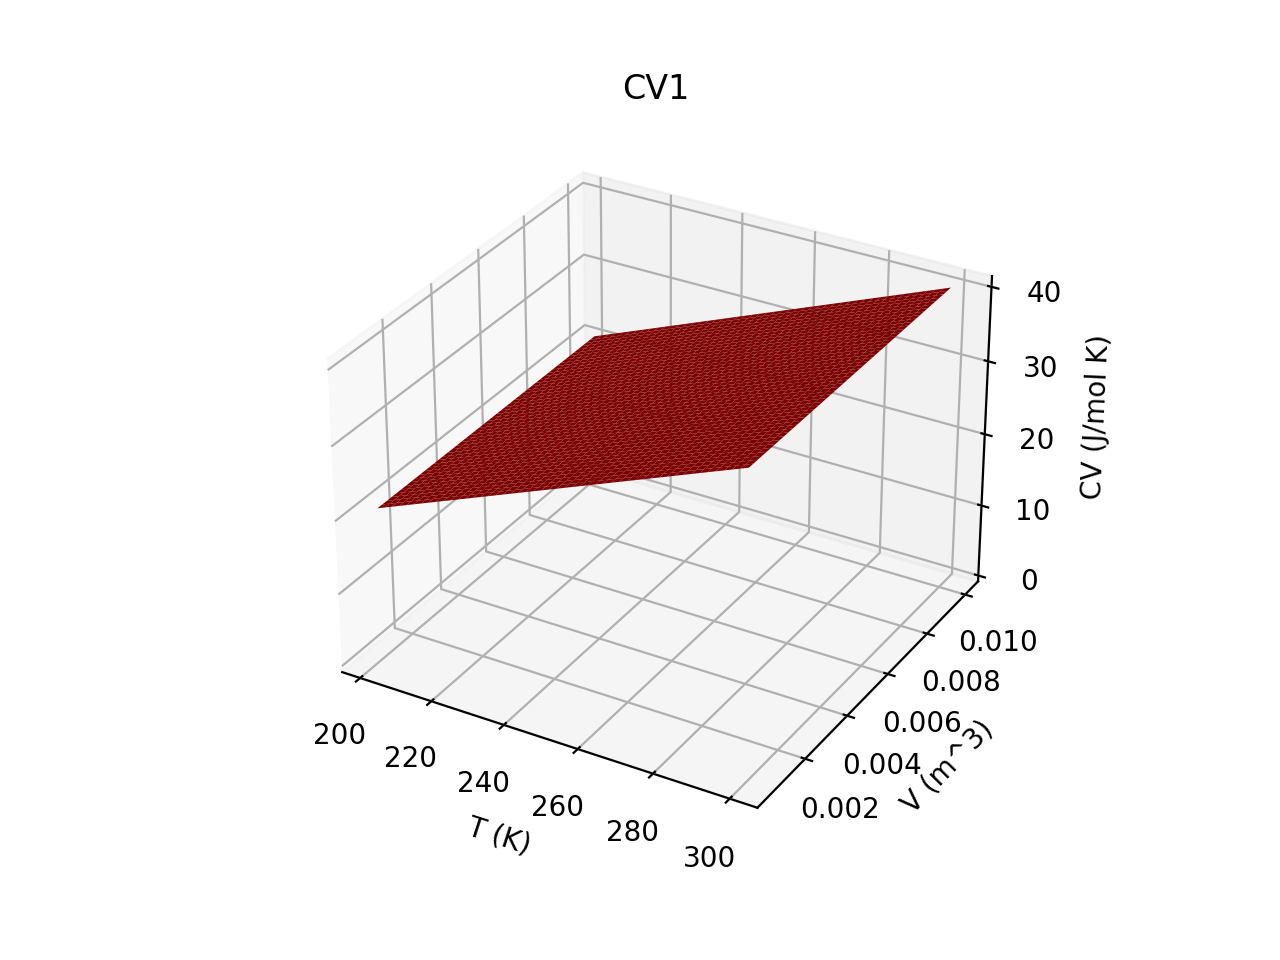

<IPython.core.display.Javascript object>


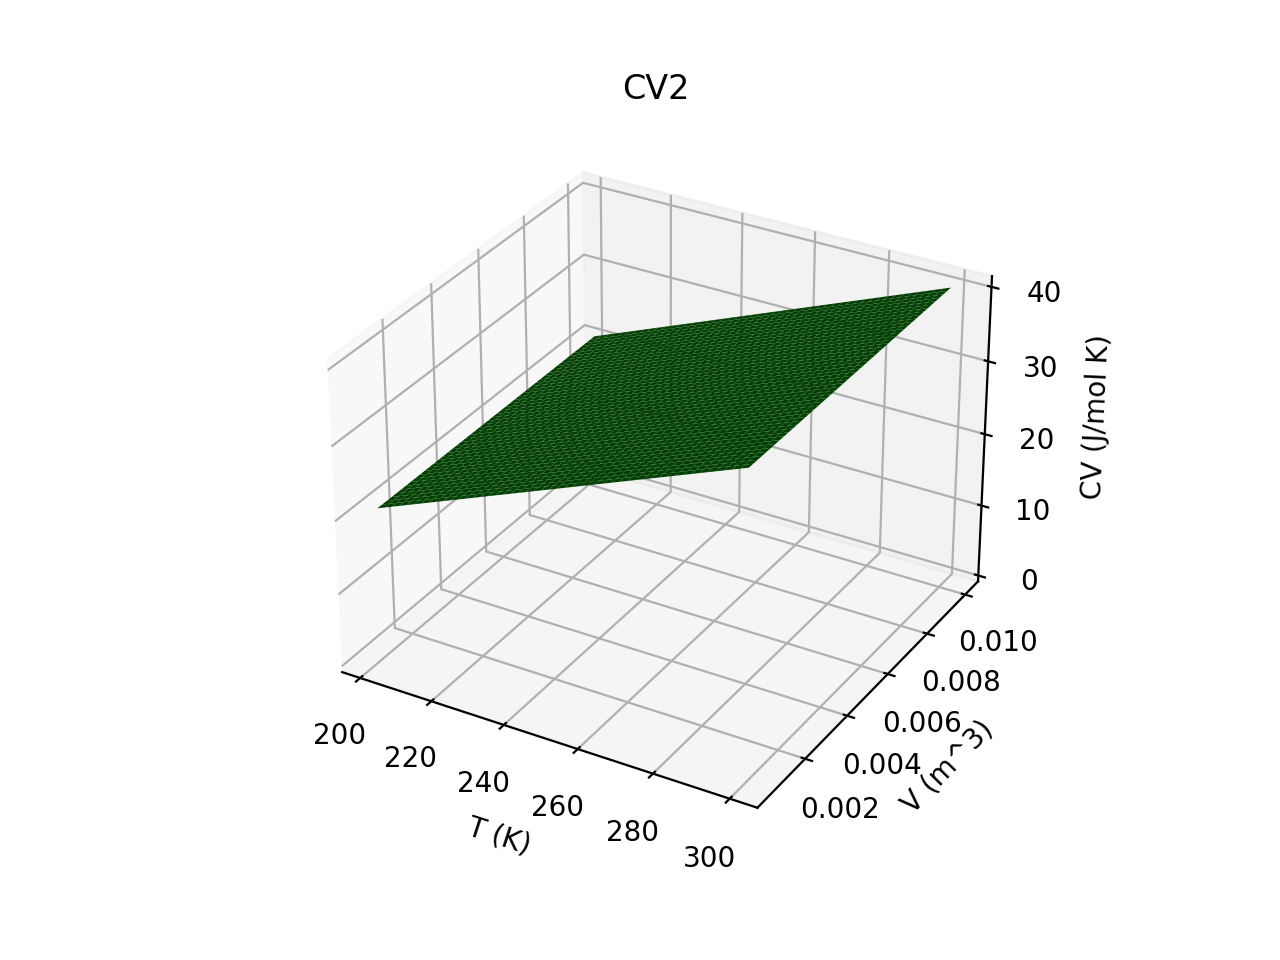

<IPython.core.display.Javascript object>


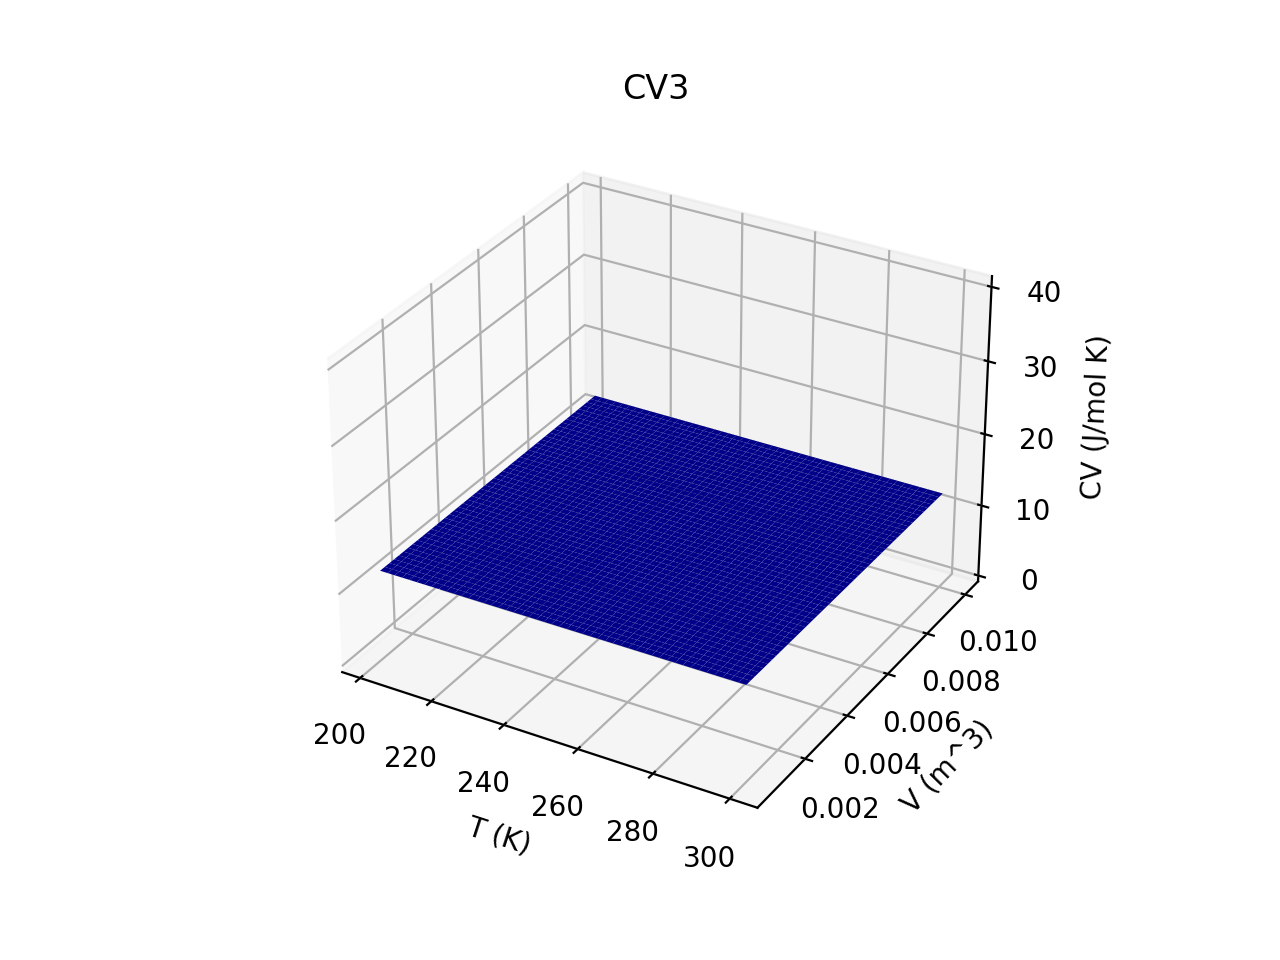

(0.0, 40.58091836734775)

In [5]:
# Get a sense of the max values for graphing
max_all_three_CVs = np.max([CV1,CV2,CV3]); print('The maximum Cv value is', max_all_three_CVs)

# Plot CV of the first grid, in red
ax = PL.plot_surface(Tgridnew, Vgridnew, CV1, color='red') 
ax.set_ylabel('V (m^3)') # Label axes
ax.set_xlabel('T (K)')
ax.set_zlabel('CV (J/mol K)')
ax.set_title('CV1')
ax.set_zlim([0,max_all_three_CVs])

# Plot CV of the second grid, in green
### BEGIN SOLUTION
ax = PL.plot_surface(Tgridnew, Vgridnew, CV2, color='green') 
ax.set_ylabel('V (m^3)') # Label axes
ax.set_xlabel('T (K)')
ax.set_zlabel('CV (J/mol K)')
ax.set_title('CV2')
ax.set_zlim([0,max_all_three_CVs])
### END SOLUTION

# Plot CV of the third grid, in blue
### BEGIN SOLUTION
ax = PL.plot_surface(Tgridnew, Vgridnew, CV3, color='blue') 
ax.set_ylabel('V (m^3)') # Label axes
ax.set_xlabel('T (K)')
ax.set_zlabel('CV (J/mol K)')
ax.set_title('CV3')
ax.set_zlim([0,max_all_three_CVs])
### END SOLUTION

### Pause for analysis
In your paper notebook, do your best at sketching these surfaces. You may also wish to write down some thoughts about what you're seeing. $C_V(T,V)$ is supposed to be flat (constant) for a monatomic ideal gas. Did that work out? Approximately what is the value of $C_V$ for that gas? For the two polyatomic gases, $C_V(T,V)$ is supposed to be an increasing function of temperature. Did that work out?

### Your turn: Calculating $\pi_T$
In the cell below, calculate three $\pi_T$ surfaces. Some notes: 
- A convenient naming convention could be piT1, piT2, and piT3 (but it's your choice).
- Don't forget that this time we want the partial in the "y" direction, so use dF_dy.

In [6]:
# Calculate the partial of U with respect to V 
### BEGIN SOLUTION
Tgridnew, Vgridnew, piT1 = PL.dF_dy([Tgrid,Vgrid],Ugrid1)
Tgridnew, Vgridnew, piT2 = PL.dF_dy([Tgrid,Vgrid],Ugrid2)
Tgridnew, Vgridnew, piT3 = PL.dF_dy([Tgrid,Vgrid],Ugrid3)
### END SOLUTION

Shape of partial derivative = (50, 49)
No units
Shape of partial derivative = (50, 49)
No units
Shape of partial derivative = (50, 49)
No units


### Your turn (again): Visualizing $\pi_T$
In the cell below, plot three $\pi_T$ surfaces, using a vertical scale based on the maximum of all three.

The maximum Cv value is 576470.5882352998


<IPython.core.display.Javascript object>


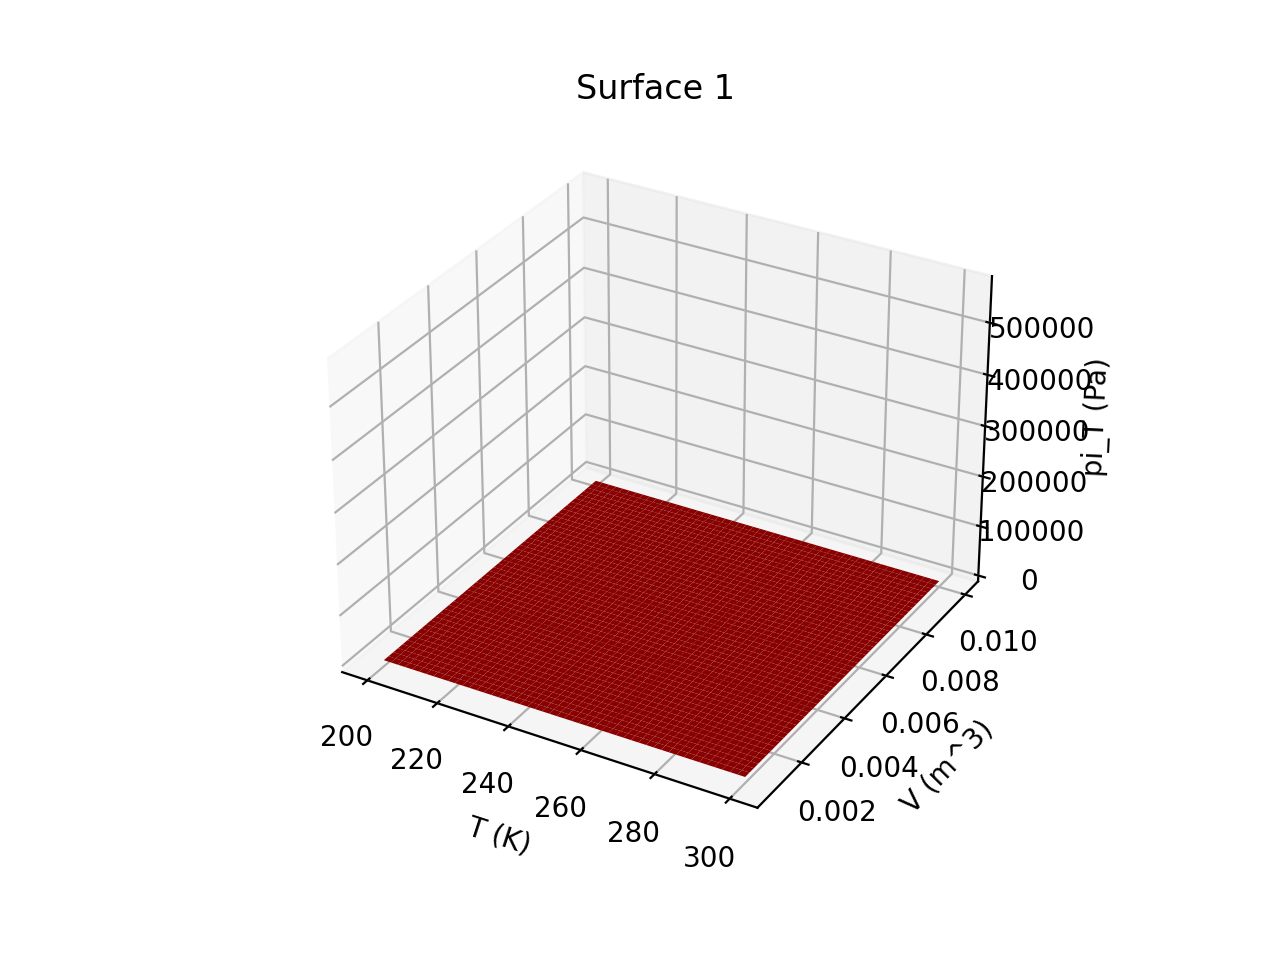

<IPython.core.display.Javascript object>


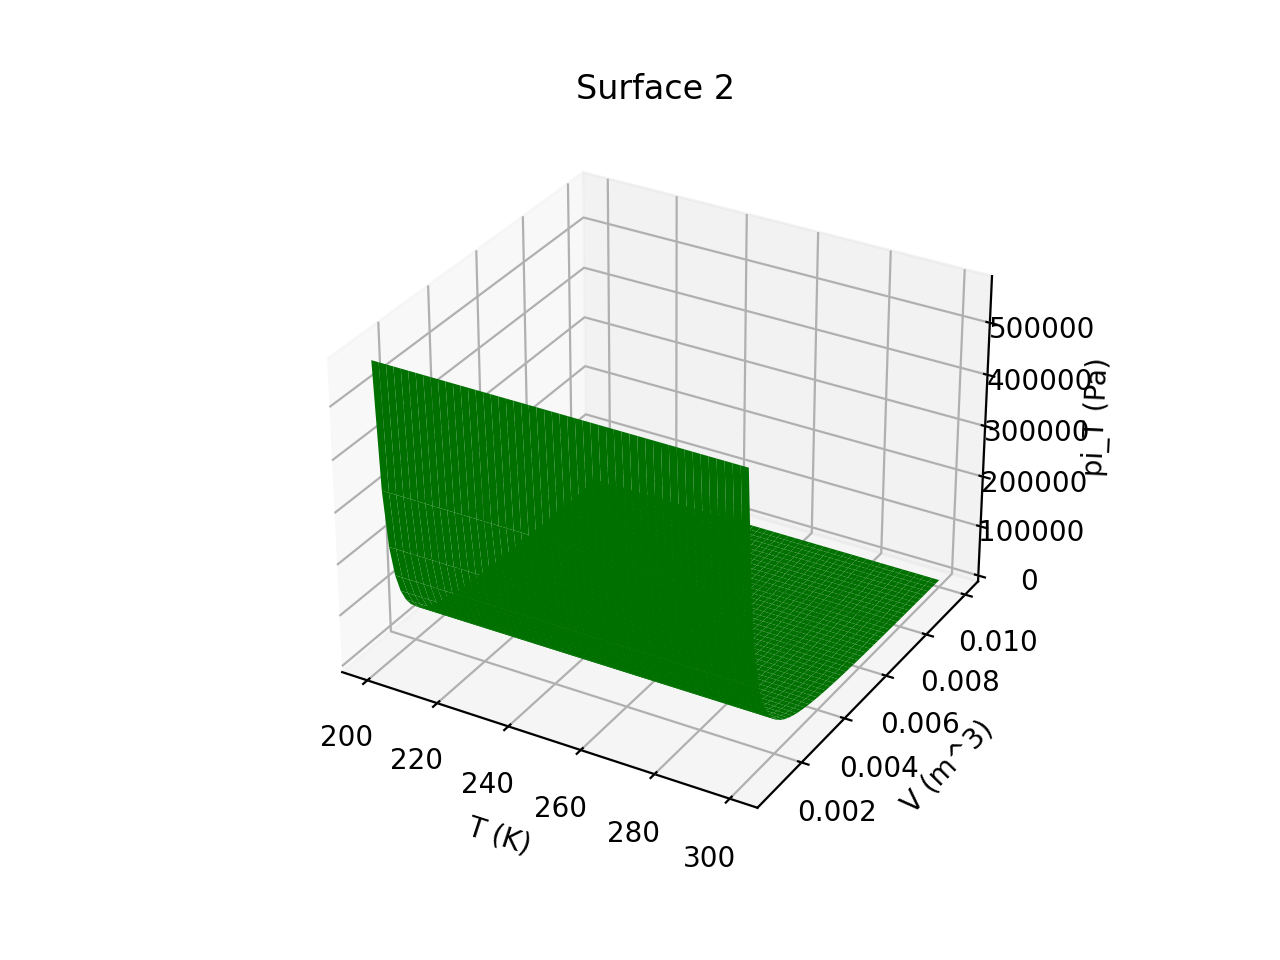

<IPython.core.display.Javascript object>


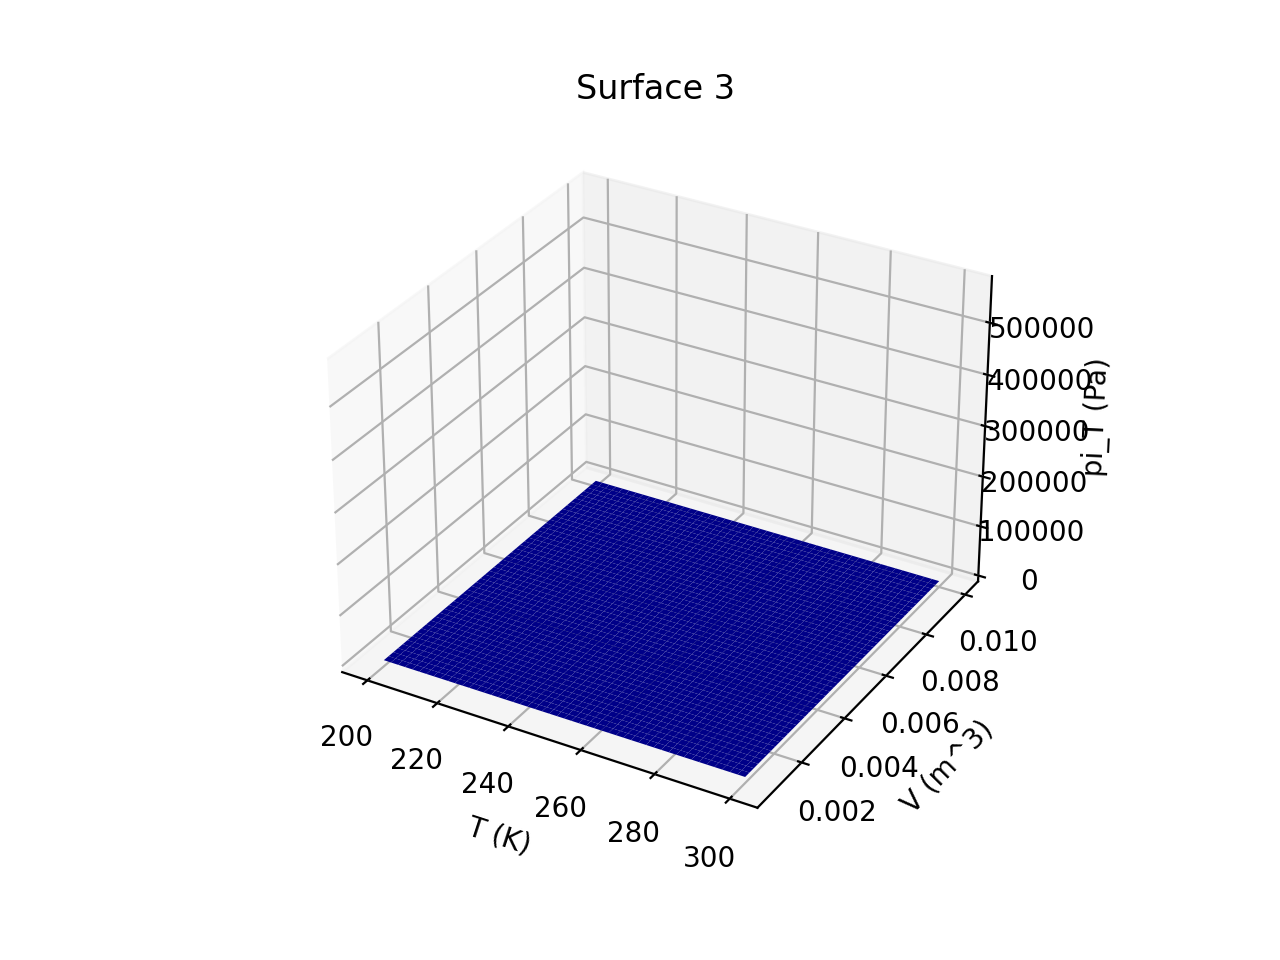

(0.0, 576470.5882352998)

In [7]:
# Get a sense of the max values for graphing
### BEGIN SOLUTION
max_all_three_piTs = np.max([piT1,piT2,piT3]); print('The maximum Cv value is', max_all_three_piTs)
### END SOLUTION

# Plot piT of the the first grid, in red
### BEGIN SOLUTION
ax = PL.plot_surface(Tgridnew, Vgridnew, piT1, color='red') # Make the mesh plot
ax.set_ylabel('V (m^3)') # Label axes
ax.set_xlabel('T (K)')
ax.set_zlabel('pi_T (Pa)')
ax.set_title('Surface 1')
ax.set_zlim([0,max_all_three_piTs])
### END SOLUTION

# Plot piT of the the second grid, in green
### BEGIN SOLUTION
ax = PL.plot_surface(Tgridnew, Vgridnew, piT2, color='green') # Make the mesh plot
ax.set_ylabel('V (m^3)') # Label axes
ax.set_xlabel('T (K)')
ax.set_zlabel('pi_T (Pa)')
ax.set_title('Surface 2')
ax.set_zlim([0,max_all_three_piTs])
### END SOLUTION

# Plot piT of the the third grid, in blue
### BEGIN SOLUTION
ax = PL.plot_surface(Tgridnew, Vgridnew, piT3, color='blue') # Make the mesh plot
ax.set_ylabel('V (m^3)') # Label axes
ax.set_xlabel('T (K)')
ax.set_zlabel('pi_T (Pa)')
ax.set_title('Surface 3')
ax.set_zlim([0,max_all_three_piTs])
### END SOLUTION

### Pause for analysis
In the cell below, enter responses to these questions:
1. You will have noticed that one of these gases has a non-zero $\pi_T$. Is it positive or negative? Does it seem to depend more on temperature or on volume? 
1. It it turns out that pressure has dimensions energy/volume (who knew?). Given that, how does one conclude that the *units* of $\pi_T$ calculated here are Pascals? 

### Validating and finishing up
Assuming all this has gone smoothly and a Kernel/Restart & Run All has run without error, don't forget to
1. Close this notebook using the "File/Close and Halt" dropdown menu
1. Using the Assignments tab, submit this notebook
1. Press the Logout tab of the Home Page